# Using Convolutional Neural Network | Classify Cifar10 Dataset

## Importing Necessory Modules

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import seaborn as sb

## Downloading Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


## Know the shape of dataset

In [3]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

## Reshaping the datset 

In [4]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

## Plotting some of the pictures

In [5]:
def plot_pic(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

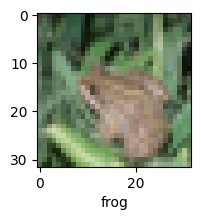

In [6]:
plot_pic(x_test,y_test,4)

## Scaling the images

In [7]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

## At first I use artificial neural network to classify the images and i got 91 percent accuracy on training dataset , But the problem is when I test this on test dataset i get horrible result of accuracy 45 percent , and precision , recall and F1 very low , that's the reason I use CNN for classification

In [8]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8106 - accuracy: 0.3543
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6225 - accuracy: 0.4278
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5415 - accuracy: 0.4572
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4801 - accuracy: 0.4789
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4307 - accuracy: 0.4968
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3881 - accuracy: 0.5122
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3502 - accuracy: 0.5272
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3172 - accuracy: 0.5366
Epoch 9/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2836 - accuracy: 0.5504
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.25

## Evaluating the model and got horrible accuracy on test data by use of ANN

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 483.9797 - accuracy: 0.4757


[483.979736328125, 0.4756999909877777]

In [13]:
from sklearn.metrics import confusion_matrix as cm , classification_report as cr

In [14]:
y_pred=model.predict(x_test)
predicted=[np.argmax(i) for i in y_pred]
predicted[:5]

313/313 [==============================] - 0s 2ms/step


[0, 0, 0, 0, 3]

In [15]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [16]:
print(cr(y_test,predicted))

              precision    recall  f1-score   support

           0       0.13      0.99      0.23      1000
           1       0.16      0.10      0.13      1000
           2       0.20      0.17      0.19      1000
           3       0.23      0.19      0.20      1000
           4       0.59      0.02      0.04      1000
           5       0.08      0.00      0.01      1000
           6       0.50      0.00      0.00      1000
           7       0.40      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.15     10000
   macro avg       0.23      0.15      0.08     10000
weighted avg       0.23      0.15      0.08     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

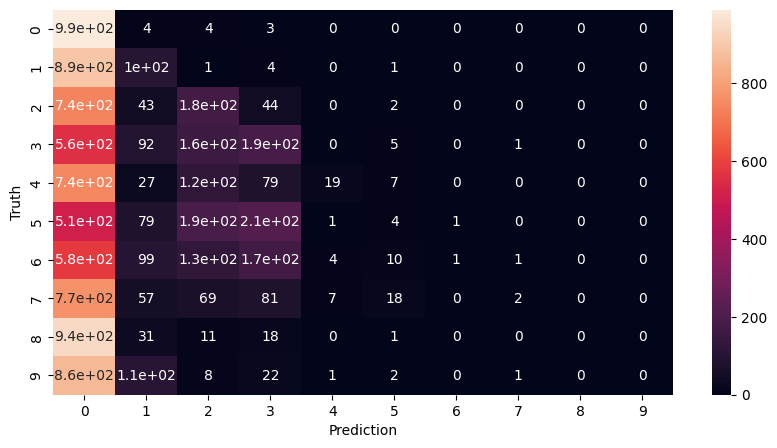

In [23]:
cmm=cm(y_test,predicted)
plt.figure(figsize=(10,5))
sb.heatmap(cmm,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

# Classify the images using CNN

In [24]:
cnn=keras.Sequential([

    #CNN
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [26]:
cnn.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4627 - accuracy: 0.4722
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1377 - accuracy: 0.5993
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0179 - accuracy: 0.6430
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9442 - accuracy: 0.6680
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8924 - accuracy: 0.6884
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8456 - accuracy: 0.7074
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8075 - accuracy: 0.7176
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7748 - accuracy: 0.7292
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7443 - accuracy: 0.7394
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.71

# Got accuracy of 68 percent on test data which is pretty good

In [27]:
cnn.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0601 - accuracy: 0.6870


[1.0601247549057007, 0.6869999766349792]

In [28]:
pred=cnn.predict(x_test_scaled)
predicted=[np.argmax(i) for i in pred]

313/313 [==============================] - 1s 2ms/step


In [29]:
predicted[:5],y_test[:5]

([3, 8, 8, 0, 6], array([3, 8, 8, 0, 6], dtype=uint8))

# Got much better value for precision recall and F1 score 

In [30]:
print(cr(y_test,predicted))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1000
           1       0.80      0.82      0.81      1000
           2       0.57      0.55      0.56      1000
           3       0.49      0.44      0.47      1000
           4       0.64      0.69      0.66      1000
           5       0.56      0.62      0.59      1000
           6       0.76      0.78      0.77      1000
           7       0.73      0.73      0.73      1000
           8       0.85      0.74      0.79      1000
           9       0.81      0.75      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



Text(95.72222222222221, 0.5, 'Truth')

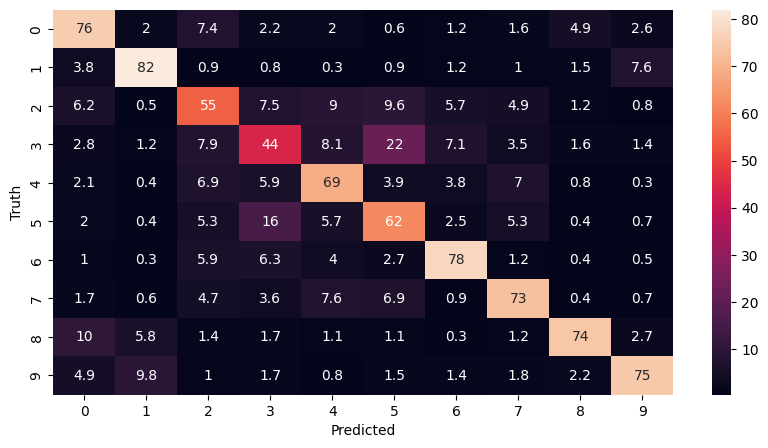

In [35]:
cn=cm(y_test,predicted)/10
plt.figure(figsize=(10,5))
sb.heatmap(cn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")